DIGITS
Train:  (60000, 28, 28)
Test:  (10000, 28, 28)
Train labels:  (10000,)
Test labels:  (60000,)
Epoch 1/15
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1428 - accuracy: 0.9567 - val_loss: 0.0463 - val_accuracy: 0.9858
Epoch 2/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0547 - accuracy: 0.9838 - val_loss: 0.0274 - val_accuracy: 0.9918
Epoch 3/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0427 - accuracy: 0.9876 - val_loss: 0.0231 - val_accuracy: 0.9928
Epoch 4/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0242 - val_accuracy: 0.9928
Epoch 5/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0274 - accuracy: 0.9922 - val_loss: 0.0276 - val_accuracy: 0.9919
Epoch 6/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0245 - val_accuracy: 0.9928
Epoch 7/15
3750/3750 [=============

c:\Users\rkbij\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


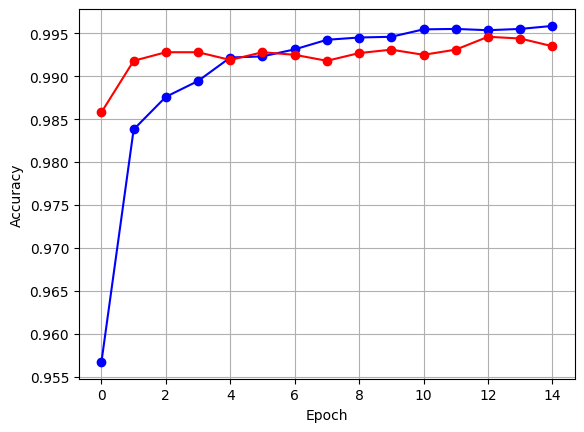

In [5]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from emnist import extract_training_samples, extract_test_samples
tf.get_logger().setLevel('ERROR')

FILTER_SIZE = 3
NUM_FILTERS = 32
INPUT_SIZE = 28
MAXPOOL_SIZE = 2
BATCH_SIZE = 16
NUMBER_OF_CLASSES = 10
EPOCHS = 15

train_digits, train_digits_labels = extract_training_samples('mnist')
test_digits, test_digits_labels = extract_test_samples('mnist')

print("DIGITS")
print('Train: ', train_digits.shape)
print('Test: ',test_digits.shape)
print('Train labels: ',test_digits_labels.shape)
print('Test labels: ',train_digits_labels.shape)

train_digits = train_digits / 255.0
test_digits = test_digits / 255.0

train_digits_labels = to_categorical(train_digits_labels, num_classes=NUMBER_OF_CLASSES)
test_digits_labels = to_categorical(test_digits_labels, num_classes=NUMBER_OF_CLASSES)

model = Sequential()
model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE),
                input_shape=(INPUT_SIZE, INPUT_SIZE, 3),
                activation='relu'))

model.add(MaxPooling2D(pool_size=(MAXPOOL_SIZE, MAXPOOL_SIZE)))

model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE),
                input_shape=(INPUT_SIZE, INPUT_SIZE, 3),
                activation='relu'))

model.add(MaxPooling2D(pool_size=(MAXPOOL_SIZE, MAXPOOL_SIZE)))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUMBER_OF_CLASSES, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

train_digits = np.expand_dims(train_digits, axis=-1)
test_digits = np.expand_dims(test_digits, axis=-1)

train_digits = np.repeat(train_digits, 3, axis=-1)
test_digits = np.repeat(test_digits, 3, axis=-1)

train_digits = np.array([cv2.resize(image, (INPUT_SIZE, INPUT_SIZE)) for image in train_digits])
test_digits = np.array([cv2.resize(image, (INPUT_SIZE, INPUT_SIZE)) for image in test_digits])

history = model.fit(train_digits, train_digits_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_digits, test_digits_labels))

x = range(EPOCHS)
plt.grid(True)
plt.plot(x, history.history['accuracy'], 'bo-', label='Training accuracy')
plt.plot(x, history.history['val_accuracy'], 'ro-', label='Testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

model.save('./model/digits.h5')

HANDWRITTEN DIGIT RECOGNITION

In [1]:
import os
import numpy as np
import tensorflow as tf
from process_image import preprocess_image
from sklearn.metrics import accuracy_score

INPUT_SIZE = 28

combined_model = tf.keras.models.load_model('./model/digits.h5')
message = list('23035468971')
data_path = './data/digits'
image_path = os.listdir(data_path)
indexes = [int(indx.replace('.jpg','')) for indx in image_path]
indexes.sort()
symbols = []

for idx in indexes:
    symbols.append(preprocess_image(data_path+'/'+str(idx)+'.jpg', INPUT_SIZE))

written_text = []
for letter in symbols:
    predictions = combined_model.predict(letter)
    predicted_class_index = np.argmax(predictions[0])
    recognized_character = str(predicted_class_index)
    written_text.append(recognized_character)

print(f"\nAccuracy: {accuracy_score(message, written_text)* 100:.2f}%")
print("Recognized characters:", ' '.join(written_text))
print('Desired characters:   ', ' '.join(message))




1/1 [==============================] - 0s 13ms/step

Accuracy: 72.73%
Recognized characters: 2 3 0 3 5 4 6 8 3 4 4
Desired characters:    2 3 0 3 5 4 6 8 9 7 1
